Load all packages you need.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Read the dataset that you prepared yesterday afternoon (without outlier and missing data). 

In [5]:
df = pd.read_csv("../data/df_imputed_clean.csv")

Create a scatterplot for the variables "BMI" and "BloodPressure".

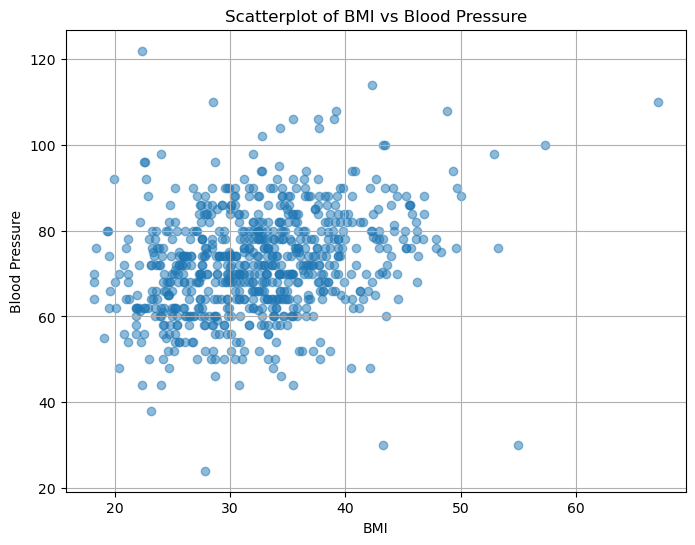

In [7]:

# Assuming 'df' is your DataFrame and it contains the columns 'BMI' and 'BloodPressure'
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI'], df['BloodPressure'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('Scatterplot of BMI vs Blood Pressure')
plt.grid(True)
plt.show()


We want to perform PCA on these two variables. But before we can do that, we need to normalize the data to avoid weighting the higher "BloodPressure" stronger than "BMI" values. If a variable is normally distributed (bell curve), a good way approach is z-score scaling. <br>
Inspect the histograms of both variables. If they are normally distributed create a dataframe with the normalized "BloodPressure_norm" and "BMI_norm". 

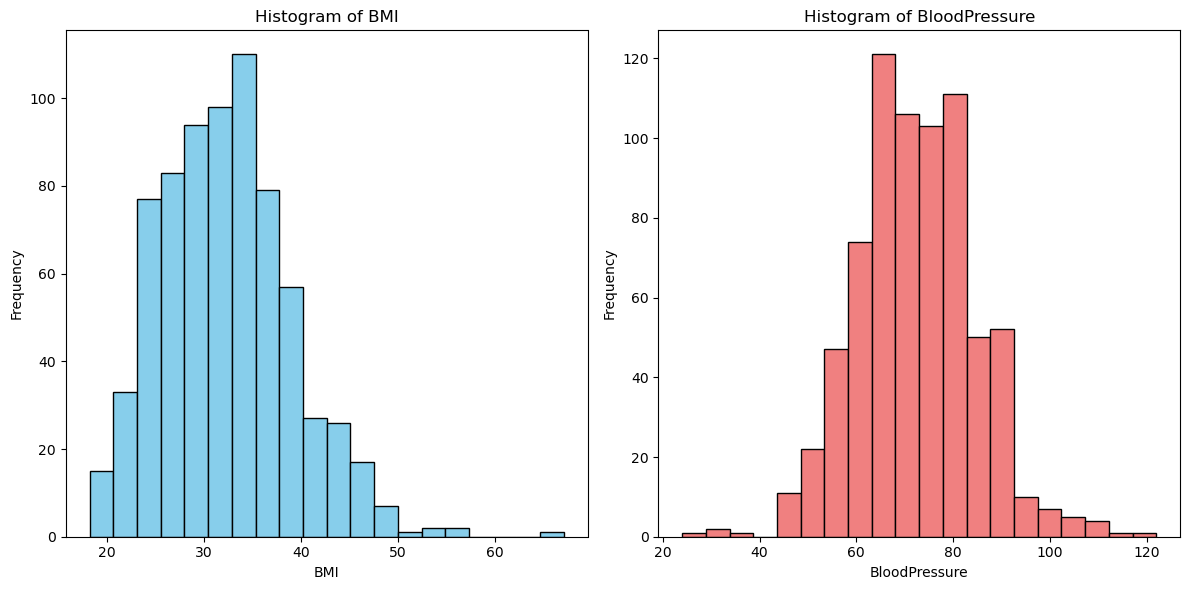

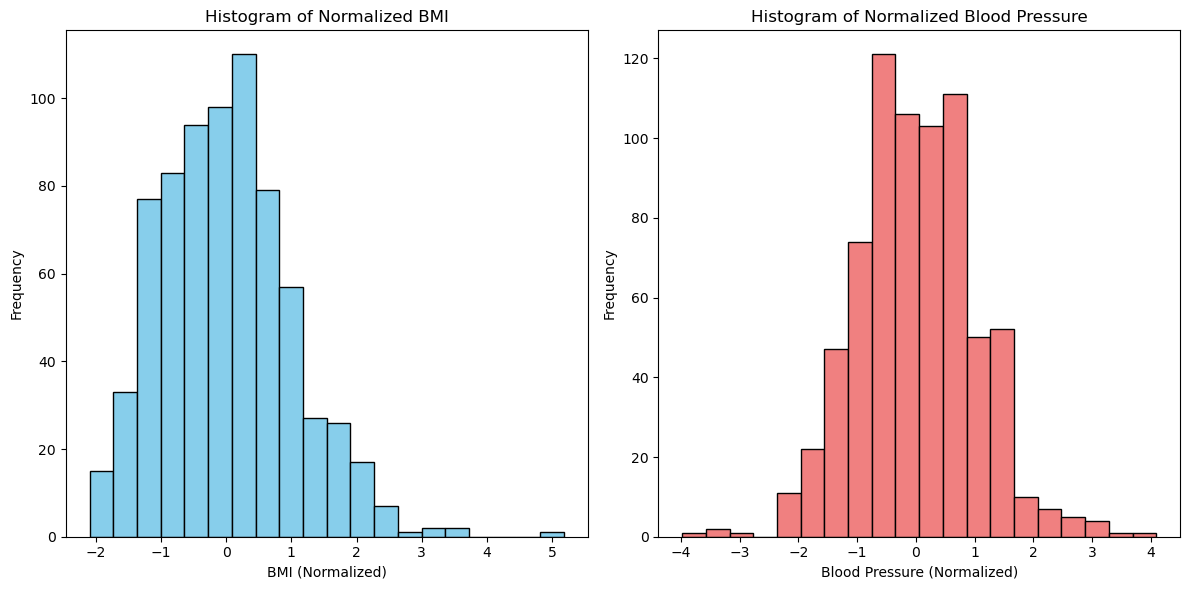

In [12]:
# Plot histograms to check for normal distribution
plt.figure(figsize=(12, 6))

# Plot BMI histogram
plt.subplot(1, 2, 1)
plt.hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Plot BloodPressure histogram
plt.subplot(1, 2, 2)
plt.hist(df['BloodPressure'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



scaler = StandardScaler()

# Normalize the data
df['BMI_norm'] = scaler.fit_transform(df[['BMI']])
df['BloodPressure_norm'] = scaler.fit_transform(df[['BloodPressure']])

# Display the new dataframe with normalized variables
df[['BMI_norm', 'BloodPressure_norm']].head()

# Plot histograms for the normalized variables
plt.figure(figsize=(12, 6))

# Plot normalized BMI histogram
plt.subplot(1, 2, 1)
plt.hist(df['BMI_norm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normalized BMI')
plt.xlabel('BMI (Normalized)')
plt.ylabel('Frequency')

# Plot normalized BloodPressure histogram
plt.subplot(1, 2, 2)
plt.hist(df['BloodPressure_norm'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Normalized Blood Pressure')
plt.xlabel('Blood Pressure (Normalized)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Perform a Principal Component Analyis (PCA) on the two variables and print the eigenvalues, the percentage of the explained variance, and the eigenvectors of the the PCs

In [13]:
from sklearn.decomposition import PCA

# Prepare the data (use the normalized columns)
X = df[['BMI_norm', 'BloodPressure_norm']]

# Initialize PCA
pca = PCA()

# Fit the PCA model to the data
pca.fit(X)

# Print the eigenvalues (variance explained by each principal component)
print("Eigenvalues (variance explained by each principal component):")
print(pca.explained_variance_)

# Print the percentage of explained variance
print("\nPercentage of explained variance by each principal component:")
print(pca.explained_variance_ratio_)

# Print the eigenvectors (principal components)
print("\nEigenvectors (principal components):")
print(pca.components_)


Eigenvalues (variance explained by each principal component):
[1.29239761 0.71034964]

Percentage of explained variance by each principal component:
[0.64531239 0.35468761]

Eigenvectors (principal components):
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


Print the eigenvectors on the scatterplot.

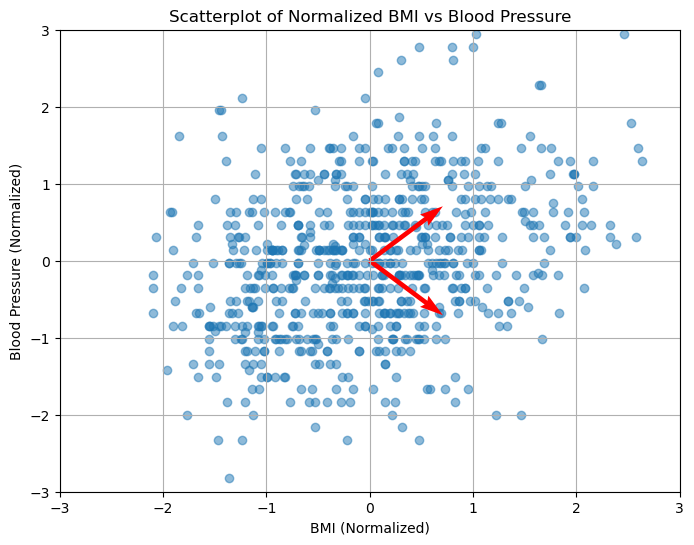

In [14]:
import numpy as np

# Create the scatterplot of the normalized data
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI_norm'], df['BloodPressure_norm'], alpha=0.5)
plt.xlabel('BMI (Normalized)')
plt.ylabel('Blood Pressure (Normalized)')
plt.title('Scatterplot of Normalized BMI vs Blood Pressure')

# Plot the eigenvectors (principal components) as arrows
# Eigenvectors are stored in pca.components_
# The first and second components are the first and second principal components
for length, vector in zip([1, 1], pca.components_):
    # Arrow start at (0,0), end at the vector direction scaled by eigenvalue
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='red', linewidth=2)

# Set axis limits for better visualization
plt.xlim([-3, 3])
plt.ylim([-3, 3])

# Show grid
plt.grid(True)
plt.show()
